In [0]:
from pyspark.sql import SparkSession

In [0]:
!pip install mlflow
#Install MLflow

import mlflow
import mlflow.sklearn
#Importing MLflow

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from pyspark.sql.functions import pandas_udf, PandasUDFType
import seaborn as sns
import matplotlib.pyplot as plt
#Import models, metrics, Datasets

mlflow.set_tracking_uri("databricks")
#Set the MLflow URI to databricks, this is to basically store all the MLflow runs in a local path

Requirement already satisfied: mlflow in /databricks/python3/lib/python3.8/site-packages (1.19.0)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from mlflow) (21.0)
Requirement already satisfied: sqlalchemy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.4.22)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Requirement already satisfied: Flask in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.0.1)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.5)
Requirement already satisfied: gunicorn in /databricks/python3/lib/python3.8/site-packages (from mlflow) (20.1.0)
Requirement already satisfied: databricks-cli>=0.8.7 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.15.0)
Requirement already satisfied: sqlparse>=0.3.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Requirement already satisfied: pyyaml>=5.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (5.4.1)
Requirement already satisfied: alembic<=1.4.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.4.1)
Requirement already satisfied: prometheus-flask-exporter in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.18.2)
Requirement already satisfied: click>=7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (8.0.1)
Requirement already satisfied: docker>=4.0.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (5.0.0)
Requirement already satisfied: protobuf>=3.7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.0)
Requirement already satisfied: cloudpickle in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.0)
Requirement already satisfied: gitpython>=2.1.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.1.18)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Requirement already satisfied: querystring-parser in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: python-editor>=0.3 in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (1.0.4)
Requirement already satisfied: Mako in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (1.1.4)
Requirement already satisfied: python-dateutil in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (2.8.1)
Requirement already satisfied: tabulate>=0.7.7 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli>=0.8.7->mlflow) (0.8.9)
Requirement already satisfied: six>=1.10.0 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli>=0.8.7->mlflow) (1.15.0)
Requirement already satisfied: websocket-client>=0.32.0 in /databricks/python3/lib/python3.8/site-packages (from docker>=4.0.0->mlflow) (1.2.1)
Requirement already satisfied: gitdb<5,>=4.0.1 in /databricks/python3/lib/python3.8/site-packages (from gitpython>=2.1.0->mlflow) (4.0.7)
Requirement already satisfied: smmap<5,>=3.0.1 in /databricks/python3/lib/python3.8/site-packages (from gitdb<5,>=4.0.1->gitpython>=2.1.0->mlflow) (4.0.0)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (fr

In [0]:
!pip install --upgrade pip
#Upgrading the Pip

Requirement already satisfied: pip in /databricks/python3/lib/python3.8/site-packages (21.2.4)

In [0]:
!pip install databricks-cli --upgrade
#Used when we setup notebook with Non-ML cluster - We pip install and upgrade MLflow - Post this rerun the second cell as python interpreter will be restarted

Requirement already satisfied: databricks-cli in /databricks/python3/lib/python3.8/site-packages (0.15.0)
Requirement already satisfied: click>=6.7 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli) (8.0.1)
Requirement already satisfied: six>=1.10.0 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli) (1.15.0)
Requirement already satisfied: tabulate>=0.7.7 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli) (0.8.9)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli) (2.24.0)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->databricks-cli) (2.10)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->databricks-cli) (1.25.11)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->databricks-cli) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->databricks-cli) (2020.12.5)

In [0]:
# Setup MLflow experiment on MLflow experiment path/ you can either create this or use the default version
mlflow.set_experiment("/Shared/MLflow_exp1")

In [0]:
data = load_iris()
Input = data['data']
Target = data['target']

#Loading a Simple Iris Dataset

In [0]:
X_train,X_test,y_train,y_test = train_test_split(Input,Target,test_size=0.3)

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
 warnings.warn(msg, UserWarning)

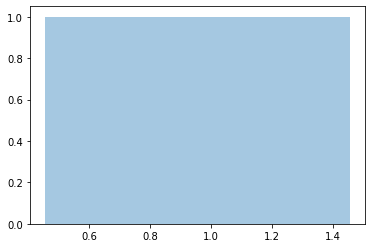

In [0]:
mlflow.sklearn.autolog()
#Enables Auto Logging feature for Sklearn estimators

# with mlflow.start_run(experiment_id=zz7142xxx955yyy):
#The above is when you wish to run MLflow experiment but want to store the experiment logs on a central experiment_id

with mlflow.start_run():
#Initiating the MLflow run
  RFC = RandomForestClassifier(n_estimators=450,max_depth=10)
  RFC.fit(X_train,y_train)
  pred = RFC.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  #Basic ML model
  
  mlflow.log_metric('Accuracy',accuracy)
  #Logging metric Accuracy
  
  fig,ax = plt.subplots(1,1)
  sns.distplot(accuracy)
  mlflow.log_figure(fig,"abc.png") 
  #Logging a distplot as image

  mlflow.log_text("This is a new test file",'abc.txt')
  #Logging a text file
  
  mlflow.sklearn.log_model(RFC,artifact_path='dbfs:/databricks/mlflow-tracking/zz7142xxx955yyy')
  # Logging the ML model with path